In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Ensure plots display inline if using a notebook
%matplotlib inline

In [ ]:
# Set the root directory
root_dir = "/Users/duchuyta/Downloads/SAP-CONUHACKS-IX/Data/Raw"

# Load the datasets with the updated paths
historical_wf_df = pd.read_csv(f'{root_dir}/historical_wildfiredata.csv')
current_wf_df = pd.read_csv(f'{root_dir}/current_wildfiredata.csv')

In [13]:
# For the current_wf_df, split the location column into latitude and longitude, then drop the location column and display the first 5 rows
current_wf_df['latitude'] = current_wf_df['location'].apply(lambda x: x.split(',')[0])
current_wf_df['longitude'] = current_wf_df['location'].apply(lambda x: x.split(',')[1])
current_wf_df.drop(columns=['location'], inplace=True)
print("current_wildfire")
print(current_wf_df.head())

# Drop location column in historical_wf_df and display the first 5 rows
historical_wf_df.drop(columns=['location'], inplace=True)
print("\nhistorical_wildfire")
print(historical_wf_df.head())

current_wildfire
             timestamp      fire_start_time severity latitude longitude
0  2024-01-01 00:00:00  2023-12-31 23:07:00      low  45.7747  -73.3052
1  2024-01-03 02:00:00  2024-01-03 01:53:00      low  44.5917  -72.7931
2  2024-01-03 10:00:00  2024-01-03 09:29:00     high  44.5963  -72.3298
3  2024-01-13 03:00:00  2024-01-13 02:04:00   medium  44.0596  -72.3365
4  2024-01-18 07:00:00  2024-01-18 06:54:00      low  45.8991  -72.4297

historical_wildfire
             timestamp      fire_start_time severity  latitude  longitude
0  2020-01-09 03:00:00  2020-01-09 02:20:00      low   45.0836   -73.3206
1  2020-02-02 03:00:00  2020-02-02 02:46:00   medium   45.8719   -73.9053
2  2020-02-16 17:00:00  2020-02-16 16:57:00      low   44.6907   -73.6182
3  2020-02-17 18:00:00  2020-02-17 17:21:00      low   44.4328   -73.9367
4  2020-03-08 02:00:00  2020-03-08 01:27:00      low   45.8508   -73.9233


In [14]:
# Check null in current_wf_df and historical_wf_df
print("\nNull in current_wildfire")
print(current_wf_df.isnull().sum())
print("\nNull in historical_wildfire")
print(historical_wf_df.isnull().sum())

# Save the cleaned datasets to the Appropriate directory
current_wf_df.to_csv('/Users/duchuyta/Downloads/SAP-CONUHACKS-IX/Data/Preprocessed_1/current_wildfiredata_cleaned.csv', index=False)
historical_wf_df.to_csv('/Users/duchuyta/Downloads/SAP-CONUHACKS-IX/Data/Preprocessed_2/historical_wildfiredata_cleaned.csv', index=False)


Null in current_wildfire
timestamp          0
fire_start_time    0
severity           0
latitude           0
longitude          0
dtype: int64

Null in historical_wildfire
timestamp          0
fire_start_time    0
severity           0
latitude           0
longitude          0
dtype: int64


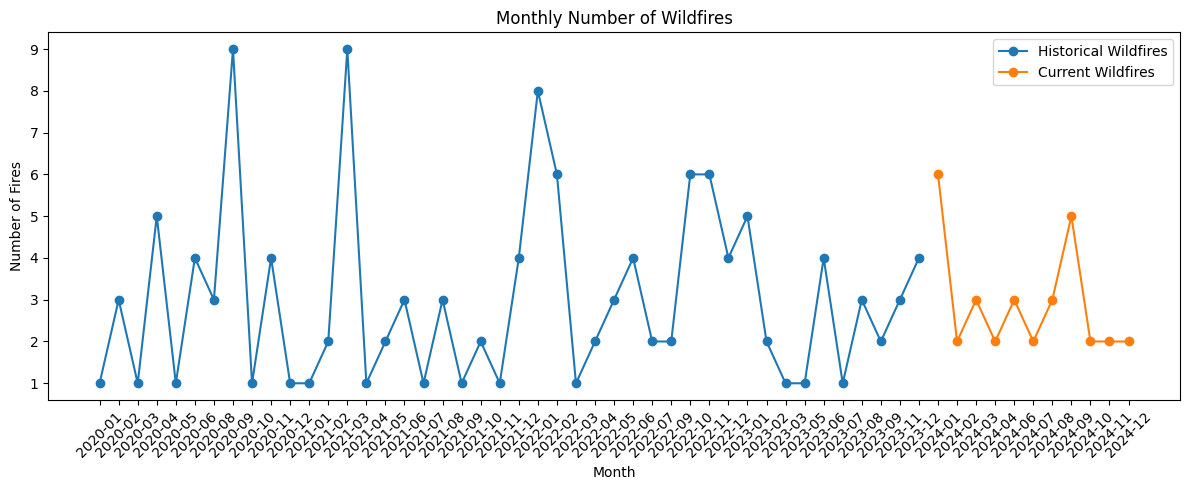

In [15]:
# Convert timestamp columns to datetime (if not already)
historical_wf_df['timestamp'] = pd.to_datetime(historical_wf_df['timestamp'])
current_wf_df['timestamp'] = pd.to_datetime(current_wf_df['timestamp'])

# --- Time Series Plot: Number of Fires per Month ---

# Create a monthly count for historical data
historical_wf_df['month'] = historical_wf_df['timestamp'].dt.to_period('M')
hist_monthly_counts = historical_wf_df.groupby('month').size().reset_index(name='count')

# Create a monthly count for current data
current_wf_df['month'] = current_wf_df['timestamp'].dt.to_period('M')
curr_monthly_counts = current_wf_df.groupby('month').size().reset_index(name='count')

plt.figure(figsize=(12, 5))
plt.plot(hist_monthly_counts['month'].astype(str), hist_monthly_counts['count'], marker='o', label='Historical Wildfires')
plt.plot(curr_monthly_counts['month'].astype(str), curr_monthly_counts['count'], marker='o', label='Current Wildfires')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Monthly Number of Wildfires')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

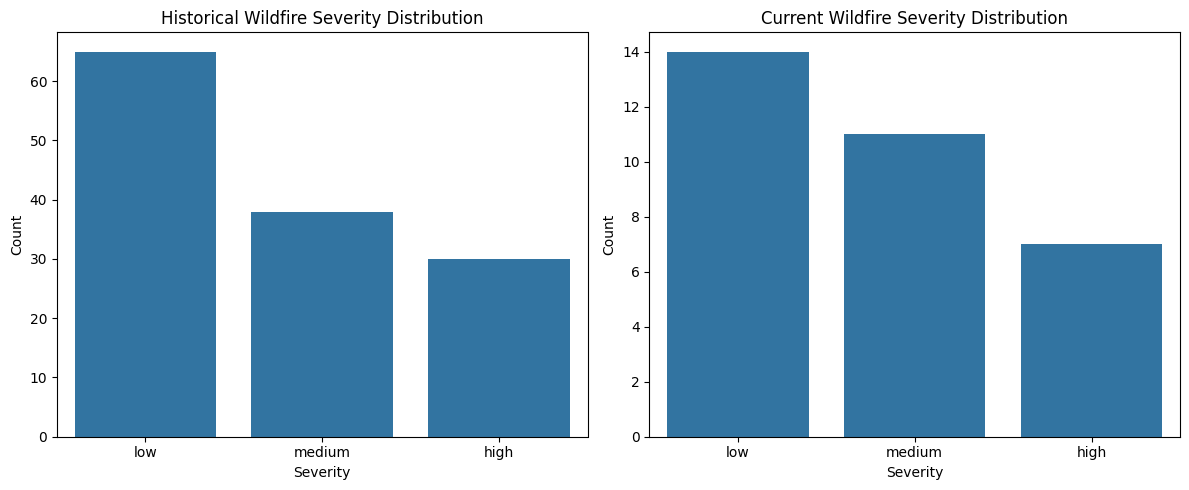

In [16]:
# --- Severity Counts Bar Chart for Both Datasets ---

plt.figure(figsize=(12, 5))

# Severity counts for historical
plt.subplot(1, 2, 1)
sns.countplot(data=historical_wf_df, x='severity', order=historical_wf_df['severity'].value_counts().index)
plt.title('Historical Wildfire Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')

# Severity counts for current
plt.subplot(1, 2, 2)
sns.countplot(data=current_wf_df, x='severity', order=current_wf_df['severity'].value_counts().index)
plt.title('Current Wildfire Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

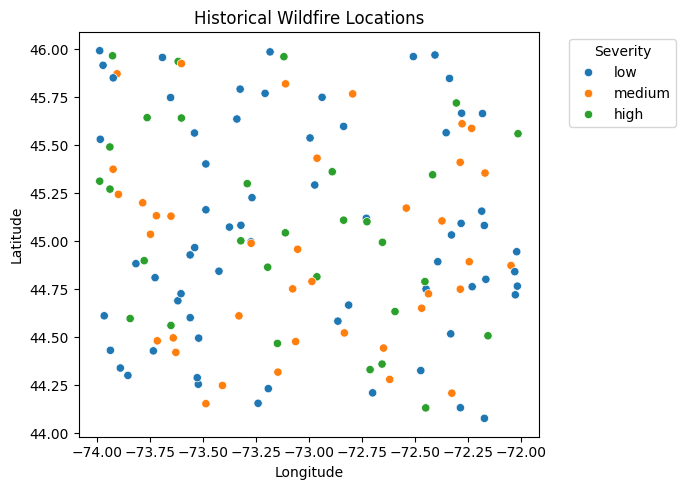

In [17]:
# --- Scatter Plot of Fire Locations ---

# Historical data already has separate latitude and longitude columns:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=historical_wf_df, x='longitude', y='latitude', hue='severity')
plt.title('Historical Wildfire Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

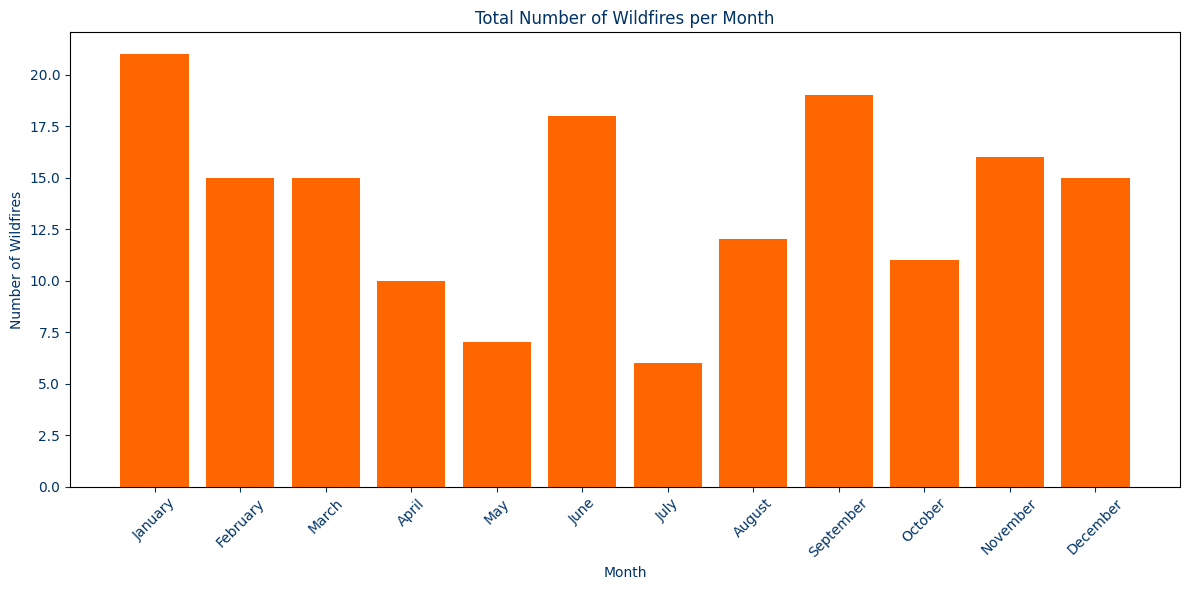

In [21]:
# --- Total Number of Wildfires per Month ---

# Combine historical and current wildfire datasets
combined_wf = pd.concat([historical_wf_df, current_wf_df])

# Extract the month (ignoring the year)
combined_wf['month_only'] = combined_wf['timestamp'].dt.month
combined_wf['timestamp'] = pd.to_datetime(combined_wf['timestamp'])

# Group by month and count the total number of wildfires
monthly_counts = combined_wf.groupby('month_only').size().reindex(range(1, 13), fill_value=0)

# Convert month numbers to month names
month_names = [calendar.month_name[i] for i in monthly_counts.index]

# Plot the aggregated counts as a bar chart with transparent background and orange columns
# Create the figure with a white background and white axes background
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#FFFFFF')
ax.set_facecolor('#FFFFFF')

# Plot the bars in color "#FF6600"
ax.bar(month_names, monthly_counts, color='#FF6600')

# Set labels and title with the frame text color "#003366"
ax.set_xlabel('Month', color='#003366')
ax.set_ylabel('Number of Wildfires', color='#003366')
ax.set_title('Total Number of Wildfires per Month', color='#003366')

# Set tick label colors to "#003366"
ax.tick_params(axis='x', colors='#003366')
ax.tick_params(axis='y', colors='#003366')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

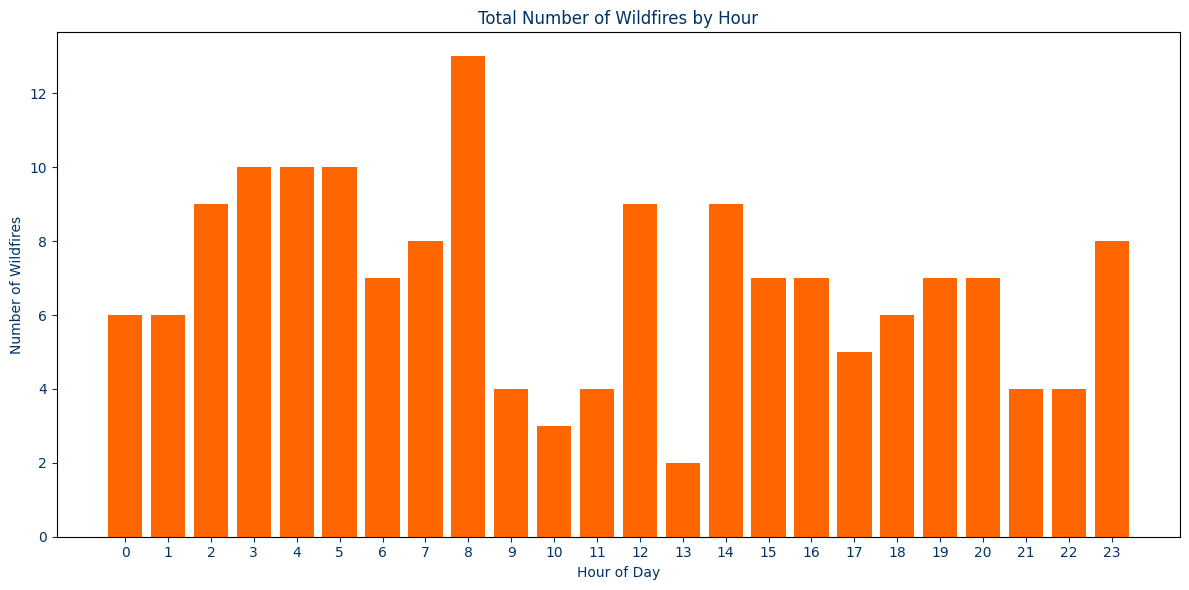

In [22]:
# --- Total Number of Wildfires by Hour ---

# Extract the hour from the timestamp
combined_wf['hour'] = combined_wf['timestamp'].dt.hour

# Group by hour and count the number of wildfires
hourly_counts = combined_wf.groupby('hour').size()

# Plot the aggregated counts by hour
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#FFFFFF')
ax.set_facecolor('#FFFFFF')

# Plot the bar chart with bars in "#FF6600"
ax.bar(hourly_counts.index, hourly_counts.values, color='#FF6600')

# Set the labels and title using "#003366"
ax.set_xlabel('Hour of Day', color='#003366')
ax.set_ylabel('Number of Wildfires', color='#003366')
ax.set_title('Total Number of Wildfires by Hour', color='#003366')

# Set tick label color to "#003366"
ax.tick_params(axis='x', colors='#003366')
ax.tick_params(axis='y', colors='#003366')

plt.xticks(range(24))
plt.tight_layout()
plt.show()